In [22]:
import seaborn as sns
import math
import numpy as np

In [23]:
iris=sns.load_dataset('iris')

In [24]:
mask1=iris['species']=='versicolor'
mask2=iris['species']=='setosa'

iris=iris[mask1 | mask2][['sepal_length','sepal_width','species']]

In [25]:
# Line 1 ----> y=3x+3
# Line 2 ----> y=8x-2

#Ax+By+C=0
#y=mx+b
#mx-y+b=0

#3x-y+3=0
#A=3,B=-1,C=3

#8x-y-2
#A=8,B=-1,C=-2

#m=-(A/B)
#b=-(C/A)
#d=|(Axi+Byi+c)|/(root under (A^2+B^2))

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
x=np.linspace(4,8,10)
y=1.5*x-5
y1=0.8*x - 2

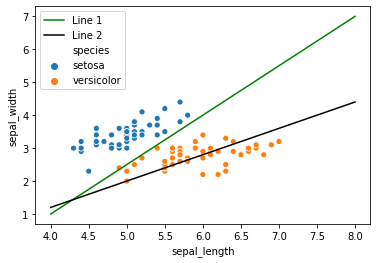

In [28]:
plt.plot(x,y,label='Line 1',color='green')
plt.plot(x,y1,label='Line 2',color='black')
sns.scatterplot(iris['sepal_length'],iris['sepal_width'],hue=iris['species'])

In [29]:
# Prove using Logistic Regression that green line is a better classifier than the black line

# Note : You have to use only the sepal_length and sepal_width cols as inputs

In [30]:
iris.head()

,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


In [31]:
iris.shape[0]

100

In [32]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 3 columns):
sepal_length    100 non-null float64
sepal_width     100 non-null float64
species         100 non-null object
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [33]:
iris.replace('setosa',+1,inplace=True)
iris.replace('versicolor',-1,inplace=True)

In [34]:
iris

,sepal_length,sepal_width,species
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1
...,...,...,...
95,5.7,3.0,-1
96,5.7,2.9,-1
97,6.2,2.9,-1
98,5.1,2.5,-1


## calculating distance for line1

In [35]:
#for line1
#y=3x+3
#3x-y+3=0
#A=3,B=-1,C=3

distance=[]
for i in range(100):
    d1=(abs((3*iris['sepal_length'].iloc[i])+((-1)*iris['sepal_width'].iloc[i]+3))/(math.sqrt((3*3)+(-1)*(-1))))
    judge1=iris['sepal_width'].iloc[i]-((3*iris['sepal_length'].iloc[i])+3)
    if judge1>0:
        d_new1=d1
    else:
        d_new1=(-1)*d1      
    distance.append(d_new1)
        
final1=[]        
for i in range(100):
    final1.append(iris['species'].iloc[i]*distance[i])
    
print(np.sum(final1))

54.51766686130284


## Calculating distance for line2

In [36]:
#for line2
#y=8x-2
#8x-y-2=0
#A=8,B=-1,C=-2

distance=[]
for i in range(100):
    d2=abs(8*iris['sepal_length'].iloc[i]+(-1)*iris['sepal_width'].iloc[i]+(-2))/(math.sqrt((8*8)+(-1)*(-1)))
    judge2=iris['sepal_width'].iloc[i]-((8*iris['sepal_length'].iloc[i])+(-2))
    if judge2>0:
        d_new2=d2
    else:
        d_new2=(-1)*d2
        
    distance.append(d_new2)
        
final2=[]        
for i in range(100):
    final2.append(iris['species'].iloc[i]*distance[i])
    
print(np.sum(final2))

50.22166403517049


# As line1 has the max distance value hence we can conclude that it is the best fit line